In [1]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

In [3]:
from dotenv import load_dotenv
import os
from langchain_google_genai import ChatGoogleGenerativeAI
# Load environment variables from .env file
load_dotenv()


google_api__key = os.getenv('GOOGLE_API_KEY')
tavily_api__key = os.getenv('TAVILY_API_KEY')


llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro-exp-0827")

c:\Users\hmazomba\miniforge3\envs\kate\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from typing import Annotated
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


tool = TavilySearchResults(max_results=2)
tools = [tool]
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

Key 'title' is not supported in schema, ignoring
Key 'title' is not supported in schema, ignoring


In [6]:
graph = graph_builder.compile(checkpointer=memory)

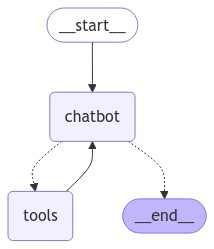

In [7]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [8]:
config = {"configurable": {"thread_id": "1"}}

In [9]:
user_input = "Hi there! My name is Will."

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there! My name is Will.
================================== Ai Message ==================================

Hi Will, it's nice to meet you! How can I help you today?


In [10]:
user_input = "What are neutrinos?"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What are neutrinos?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (680b0e52-ddc0-42de-a932-6198c6dd6ecb)
 Call ID: 680b0e52-ddc0-42de-a932-6198c6dd6ecb
  Args:
    query: What are neutrinos?
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.pbs.org/newshour/science/what-is-a-neutrino-and-why-should-anyone-but-a-particle-physicist-care", "content": "Neutrinos are nearly massless, chargeless particles that travel at near lightspeeds and are abundant in the universe. They are produced by nuclear fusion in the sun and may help explain why the universe is made of matter, not antimatter."}, {"url": "https://www.space.com/what-are-neutrinos", "content": "Neutrinos are tiny subatomic particles, often called 'ghost particles' because they barely interact

In [11]:
user_input = "Gimme the latest tech news of this week"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Gimme the latest tech news of this week
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (01d8d840-c992-4bbf-b7dd-79846797f581)
 Call ID: 01d8d840-c992-4bbf-b7dd-79846797f581
  Args:
    query: Latest tech news this week
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://apnews.com/technology", "content": "Hint: Be true to yourself\nArtificial Intelligence\nArtificial intelligence technology behind ChatGPT was built in Iowa — with a lot of water\nThis week’s turmoil with ChatGPT-maker OpenAI has heightened trust concerns in the AI world\nOpenAI brings back Sam Altman as CEO just days after his firing unleashed chaos\nWhat you need to know about Emmett Shear, OpenAI’s new interim CEO\nInsider Q&A: Pentagon AI chief on network-centric warfare, generative 

In [12]:
user_input = "Is Odin a trinity?"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Is Odin a trinity?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (82338bf4-59fe-4c7e-b9d2-21053e5871ac)
 Call ID: 82338bf4-59fe-4c7e-b9d2-21053e5871ac
  Args:
    query: Is Odin a trinity?
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://viking.style/the-norse-trinity-understanding-the-sacred-triad/", "content": "Comprising Odin, Thor, and Freyr, the Norse Trinity holds a significant place in Norse mythology, and each deity plays a crucial role in the Norse cosmos. The Norse Trinity emerged as the primary deities within Asgard, with Odin, Thor, and Freyr playing crucial roles in the Norse cosmos. The Norse Trinity, composed of Odin, Thor, and Freyr, is a sacred triad that highlights the interdependency of these three deities in ancient Norse mythol